<a href="https://colab.research.google.com/github/JSEFERINO/ESTADISTICA-INFERENCIAL-2025/blob/main/Lab12_Julio_Hurtado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 12: Prueba de la Diferencia entre Dos Medias Poblacionales**
## **Por Julio Hurtado**


### **Ejercicio ilustrativo: Planteamiento del Problema**

Se desea evaluar la efectividad de un nuevo programa de entrenamiento midiendo el tiempo (en segundos) que tardaron 10 atletas en correr 400 metros **antes y después del programa**.

### **Datos Observados**

| Atleta | Antes (A) | Después (D) | Diferencia (A - D) |
|--------|-----------|-------------|--------------------|
| 1      | 55.2      | 54.1        | 1.1                |
| 2      | 56.8      | 55.5        | 1.3                |
| 3      | 57.1      | 56.9        | 0.2                |
| 4      | 58.0      | 57.2        | 0.8                |
| 5      | 54.9      | 54.9        | 0.0                |
| 6      | 56.3      | 55.8        | 0.5                |
| 7      | 55.5      | 55.0        | 0.5                |
| 8      | 57.5      | 56.6        | 0.9                |
| 9      | 56.0      | 55.9        | 0.1                |
| 10     | 57.8      | 57.0        | 0.8                |

---

### **Hipótesis**

Queremos saber si el programa **tiene un efecto significativo**, es decir, si hay una diferencia media distinta de 0.

- $H_0$: $\mu_d = 0$ (el programa no tiene efecto).
- $H_1$: $\mu_d > 0$ (el tiempo mejora tras el programa → diferencias positivas).

Donde $\mu_d$ es la media de las diferencias (Antes - Después).

---

### **Estadísticos**

Cálculos con los datos de las diferencias:

- $n = 10$
- $\bar{d} = \dfrac{1.1 + 1.3 + 0.2 + 0.8 + 0.0 + 0.5 + 0.5 + 0.9 + 0.1 + 0.8}{10} = 0.62$
- Varianza muestral de las diferencias:

$$
s_d^2 = \dfrac{\sum (d_i - \bar{d})^2}{n - 1} = \dfrac{1.056}{9} \approx 0.1173
$$

- Desviación estándar:

$$
s_d = \sqrt{0.1173} \approx 0.3425
$$

- Estadístico t:

$$
t = \dfrac{\bar{d} - 0}{s_d/\sqrt{n}} = \dfrac{0.62}{0.3425/\sqrt{10}} \approx \dfrac{0.62}{0.1083} \approx 5.725
$$

---

### **Decisión**

- Grados de libertad: $df = n - 1 = 9$
- Nivel de significancia: $\alpha = 0.05$
- Valor crítico: $t_{0.05, 9} \approx 1.833$

Como $t = 5.725 > 1.833$, **rechazamos $H_0$**.

---

### **Conclusión**

A un nivel de significancia del 5%, **sí hay evidencia suficiente para afirmar que el programa de entrenamiento mejora significativamente el tiempo de carrera** de los atletas.

---


## **Usando R en colab**

In [2]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython
#%%R

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-2.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Estadístico t: 4.516479 
Valor p: 0.001454121 
Rechazamos la hipótesis nula.



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



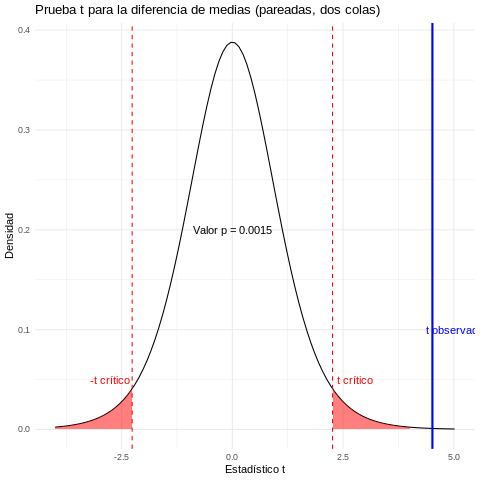

In [3]:
%%R
# Datos
antes <- c(55.2, 56.8, 57.1, 58.0, 54.9, 56.3, 55.5, 57.5, 56.0, 57.8)
despues <- c(54.1, 55.5, 56.9, 57.2, 54.9, 55.8, 55.0, 56.6, 55.9, 57.0)
diferencias <- antes - despues
n <- length(diferencias)
media_d <- mean(diferencias)
sd_d <- sd(diferencias)
alfa <- 0.05
gl <- n - 1

# Calcular el estadístico de prueba t
t_estadistico <- (media_d - 0) / (sd_d / sqrt(n))
cat("Estadístico t:", t_estadistico, "\n")
# Calcular el valor p (prueba de dos colas)
p_valor <- 2 * pt(abs(t_estadistico), df = gl, lower.tail = FALSE)
cat("Valor p:", p_valor, "\n")
# Decisión
if (p_valor <= alfa) {
  cat("Rechazamos la hipótesis nula.\n")
} else {
  cat("No rechazamos la hipótesis nula.\n")
}
# Visualización de la región crítica y el valor p
library(ggplot2)
library(dplyr)

# Crear el gráfico
df <- data.frame(x = seq(-4, 4, 0.01))
t_critico <- qt(1 - alfa/2, df = gl)

ggplot(df, aes(x = x)) +
  stat_function(fun = dt, args = list(df = gl)) +
  # Región crítica (roja)
  geom_area(data = subset(df, x < -t_critico),
            aes(y = dt(x, df = gl)), fill = "red", alpha = 0.5) +
  geom_area(data = subset(df, x > t_critico),
            aes(y = dt(x, df = gl)), fill = "red", alpha = 0.5) +
  # Valor p (amarillo)
  geom_area(data = subset(df, x > abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(df, x < -abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "yellow", alpha = 0.5) +
  # Líneas críticas
  geom_vline(xintercept = c(-t_critico, t_critico), linetype = "dashed", color = "red") +
  # Línea del estadístico observado
  geom_vline(xintercept = t_estadistico, color = "blue", linewidth = 1) +
  # Anotaciones
  annotate("text", x = -t_critico - 0.5, y = 0.05, label = "-t crítico", color = "red") +
  annotate("text", x = t_critico + 0.5, y = 0.05, label = "t crítico", color = "red") +
  annotate("text", x = t_estadistico + 0.5, y = 0.1, label = "t observado", color = "blue") +
  annotate("text", x = 0, y = 0.2, label = paste("Valor p =", round(p_valor, 4)), color = "black") +
  labs(title = "Prueba t para la diferencia de medias (pareadas, dos colas)",
       x = "Estadístico t",
       y = "Densidad") +
  theme_minimal()

## **Usando Python**

Estadístico t: 4.5165
Valor p: 0.0015
Rechazamos la hipótesis nula.


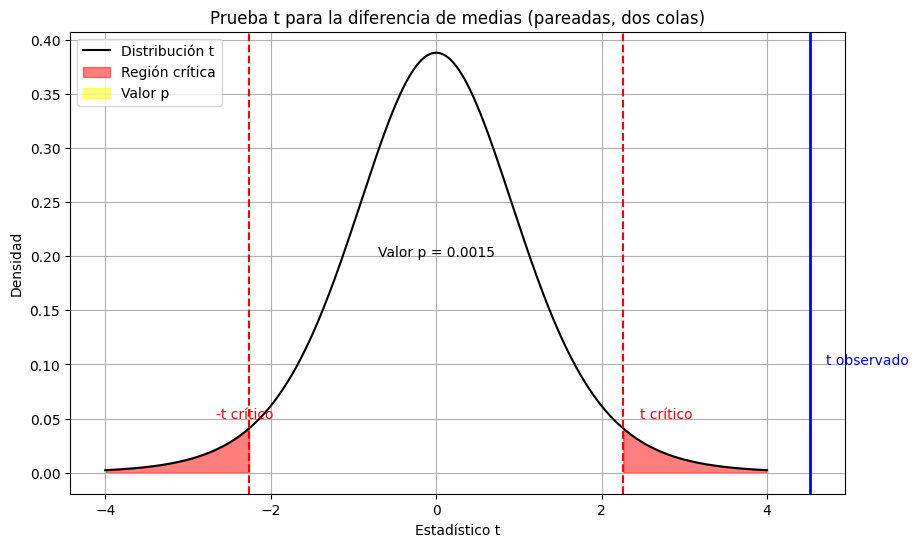

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos
antes = np.array([55.2, 56.8, 57.1, 58.0, 54.9, 56.3, 55.5, 57.5, 56.0, 57.8])
despues = np.array([54.1, 55.5, 56.9, 57.2, 54.9, 55.8, 55.0, 56.6, 55.9, 57.0])
diferencias = antes - despues

# Estadísticos
n = len(diferencias)
media_d = np.mean(diferencias)
sd_d = np.std(diferencias, ddof=1)
alfa = 0.05
gl = n - 1

# Estadístico t
t_estadistico = media_d / (sd_d / np.sqrt(n))
p_valor = 2 * stats.t.sf(np.abs(t_estadistico), df=gl)

print("Estadístico t:", round(t_estadistico, 4))
print("Valor p:", round(p_valor, 4))
if p_valor <= alfa:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

# Visualización
x = np.linspace(-4, 4, 1000)
t_critico = stats.t.ppf(1 - alfa/2, df=gl)
y = stats.t.pdf(x, df=gl)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución t', color='black')

# Regiones críticas
plt.fill_between(x, y, where=(x < -t_critico), color='red', alpha=0.5, label='Región crítica')
plt.fill_between(x, y, where=(x > t_critico), color='red', alpha=0.5)

# Región del valor p
plt.fill_between(x, y, where=(x > np.abs(t_estadistico)), color='yellow', alpha=0.5, label='Valor p')
plt.fill_between(x, y, where=(x < -np.abs(t_estadistico)), color='yellow', alpha=0.5)

# Líneas
plt.axvline(-t_critico, color='red', linestyle='--')
plt.axvline(t_critico, color='red', linestyle='--')
plt.axvline(t_estadistico, color='blue', linewidth=2)

# Anotaciones
plt.text(-t_critico - 0.4, 0.05, '-t crítico', color='red')
plt.text(t_critico + 0.2, 0.05, 't crítico', color='red')
plt.text(t_estadistico + 0.2, 0.1, 't observado', color='blue')
plt.text(0, 0.2, f"Valor p = {p_valor:.4f}", ha='center', color='black')

# Etiquetas
plt.title("Prueba t para la diferencia de medias (pareadas, dos colas)")
plt.xlabel("Estadístico t")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# prompt: Escribe el codigo anterior en python

# Datos
antes = [55.2, 56.8, 57.1, 58.0, 54.9, 56.3, 55.5, 57.5, 56.0, 57.8]
despues = [54.1, 55.5, 56.9, 57.2, 54.9, 55.8, 55.0, 56.6, 55.9, 57.0]
diferencias = [a - d for a, d in zip(antes, despues)]
n = len(diferencias)
media_d = sum(diferencias) / n
sd_d = (sum([(d - media_d)**2 for d in diferencias]) / (n - 1))**0.5
alfa = 0.05
gl = n - 1

# Calcular el estadístico de prueba t
t_estadistico = (media_d - 0) / (sd_d / (n**0.5))
print("Estadístico t:", t_estadistico)

# Para calcular el valor p necesitamos una libreria como scipy
from scipy import stats

# Calcular el valor p (prueba de dos colas)
p_valor = 2 * (1 - stats.t.cdf(abs(t_estadistico), df=gl))
print("Valor p:", p_valor)

# Decisión
if p_valor <= alfa:
  print("Rechazamos la hipótesis nula.")
else:
  print("No rechazamos la hipótesis nula.")


Estadístico t: 4.5164792599612875
Valor p: 0.0014541212479248777
Rechazamos la hipótesis nula.
